In [1]:
# 필요한 라이브러리를 임포트합니다
import pandas as pd            # 데이터 프레임을 다루기 위한 Pandas
import numpy as np             # 배열 및 수학 연산을 위한 NumPy
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 Matplotlib
from sklearn.model_selection import train_test_split    # 데이터 분할을 위한 Scikit-Learn
from sklearn.preprocessing import StandardScaler    # 데이터 표준화를 위한 Scikit-Learn

# 딥러닝 모델을 만들기 위한 Keras 라이브러리 관련 모듈을 임포트합니다
from keras.models import Sequential # Sequential 모델
from keras.layers import Dense, Dropout # 신경망 레이어와 드롭아웃 레이어
from keras.callbacks import EarlyStopping, ModelCheckpoint # 조기 종료와 모델 체크포인트 콜백
# 드롭아웃 : 과적합을 막기 위해 일부 노드를 쓰지 않는 기법
# 모델체크포인트 : 가장 높은 정확도, 낮은 오차 등을 가진 최고의 모델을 기록해놓고 나중에 꺼내쓰는 것.

In [2]:
# 데이터를 불러옵니다. 이 데이터는 주택 가격과 관련된 정보를 포함한 CSV 파일입니다.
data = pd.read_csv('https://raw.githubusercontent.com/BigDeepData/2312_dl/main/data/HousePrices.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 필요한 열을 선택하고 결측치를 처리합니다.
data = data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']]
data.dropna(inplace=True)  # 결측치가 있는 행을 제거합니다.

# 특성과 레이블을 분리합니다.
X = data.drop('SalePrice', axis=1)  # 입력 특성 (독립 변수)
y = data['SalePrice']  # 출력 레이블 (종속 변수)

# 데이터를 학습용과 테스트용으로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터를 표준화합니다. (평균을 0, 표준 편차를 1로 만듦)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-4-477bf2e77c6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # 결측치가 있는 행을 제거합니다.


In [5]:
# 딥러닝 모델을 생성합니다. 이 모델은 Sequential 모델로 시작합니다.
model = Sequential([
    # 첫 번째 은닉층(Dense)을 추가합니다. 128개의 뉴런을 가지며 활성화 함수는 ReLU를 사용합니다.
    # 입력 특성의 크기(input_shape)는 X_train의 열의 수와 일치하도록 설정합니다.
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    # 드롭아웃(Dropout) 레이어를 추가합니다. 오버피팅을 방지하기 위해 20%의 뉴런을 비활성화합니다.
    Dropout(0.2),

    # 두 번째 은닉층(Dense)을 추가합니다. 64개의 뉴런을 가지며 활성화 함수는 ReLU를 사용합니다.
    Dense(64, activation='relu'),

    # 출력 레이어(Dense)를 추가합니다. 하나의 뉴런을 가지며 출력 값은 주택 가격을 예측하는 값입니다.
    Dense(1)
])

# 모델의 요약 정보를 출력합니다. 모델 구조와 파라미터 수 등을 확인할 수 있습니다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# 모델을 컴파일합니다. 컴파일 단계에서는 모델의 학습 방법과 손실 함수를 설정합니다.

# 옵티마이저(optimizer)는 'adam'을 사용합니다. Adam은 효율적인 최적화 알고리즘 중 하나입니다.
# Adam은 학습률(learning rate)을 자동으로 조정하여 빠른 수렴을 도와줍니다.

# 손실 함수(loss)는 'mean_squared_error'를 사용합니다. 이것은 회귀(Regression) 문제에서 일반적으로 사용되는
# 손실 함수로 예측값과 실제값 간의 평균 제곱 오차를 최소화하려고 합니다.
model.compile(loss='mean_squared_error', optimizer='adam')

In [7]:
# 조기 종료(Early Stopping) 콜백을 설정합니다. 이 콜백은 검증 손실(validation loss)을 모니터링하고,
# 10번의 연속적인 검증 손실 상승(patience=10)이 발생하면 학습을 조기에 종료합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 체크포인트(Model Checkpoint) 콜백을 설정합니다. 이 콜백은 최상의 검증 성능을 가진 모델을 저장합니다.
# save_best_only=True로 설정하면 검증 손실이 감소할 때만 모델을 저장합니다.
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# 모델을 훈련합니다.
# - X_train: 학습 데이터
# - y_train: 학습 레이블
# - epochs: 에포크 수, 모델이 전체 데이터를 몇 번 반복 학습할지를 나타냅니다.
# - validation_split: 학습 데이터의 일부를 검증 데이터로 사용하여 모델의 성능을 평가합니다.
# - callbacks: 조기 종료와 모델 체크포인트 콜백을 설정합니다.
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/200
30/30 [==============================] - 1s 11ms/step - loss: 39146106880.0000 - val_loss: 37840314368.0000
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 39142965248.0000 - val_loss: 37835493376.0000
Epoch 3/200
 1/30 [>.............................] - ETA: 0s - loss: 34011228160.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 0s 5ms/step - loss: 39134437376.0000 - val_loss: 37823840256.0000
Epoch 4/200
30/30 [==============================] - 0s 5ms/step - loss: 39116419072.0000 - val_loss: 37799964672.0000
Epoch 5/200
30/30 [==============================] - 0s 5ms/step - loss: 39082504192.0000 - val_loss: 37758726144.0000
Epoch 6/200
30/30 [==============================] - 0s 5ms/step - loss: 39026757632.0000 - val_loss: 37695066112.0000
Epoch 7/200
30/30 [==============================] - 0s 4ms/step - loss: 38941978624.0000 - val_loss: 37600665600.0000
Epoch 8/200
30/30 [==============================] - 0s 5ms/step - loss: 38820769792.0000 - val_loss: 37473304576.0000
Epoch 9/200
30/30 [==============================] - 0s 5ms/step - loss: 38662336512.0000 - val_loss: 37305675776.0000
Epoch 10/200
30/30 [==============================] - 0s 8ms/step - loss: 38459207680.0000 - val_loss: 37091840000.0000
Epoch 11/200
30/30 [==============================] - 0s 7m

In [8]:
# 모델을 평가합니다. 테스트 데이터(X_test, y_test)를 사용하여 모델의 성능을 평가합니다.
# 모델이 손실 함수로 정의한 평균 제곱 오차(Mean Squared Error)를 계산하여 출력합니다.
model.evaluate(X_test, y_test)

# 모델을 사용하여 예측을 수행합니다. 테스트 데이터(X_test)를 입력으로 사용하고,
# 모델은 입력 데이터에 대한 주택 가격(SalePrice) 예측을 수행하여 predictions 변수에 저장합니다.
predictions = model.predict(X_test)

10/10 [==============================] - 0s 8ms/step


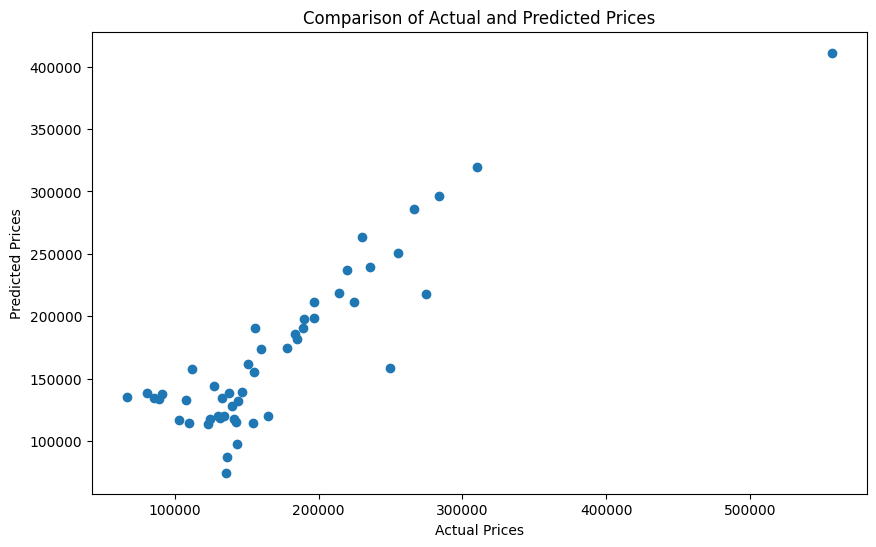

In [9]:
# 테스트 데이터에서 무작위로 50개의 샘플을 선택합니다.
sample_indices = np.random.choice(X_test.shape[0], 50, replace=False)

# 선택한 샘플에 대한 실제 가격과 모델의 예측 가격을 가져옵니다.
sample_true_values = y_test.iloc[sample_indices]
sample_predictions = predictions[sample_indices]

# 산점도(Scatter Plot)를 그립니다. x 축에는 실제 가격을, y 축에는 예측 가격을 표시합니다.
plt.figure(figsize=(10,6))
plt.scatter(sample_true_values, sample_predictions)
plt.xlabel('Actual Prices')       # x 축 레이블
plt.ylabel('Predicted Prices')    # y 축 레이블
plt.title('Comparison of Actual and Predicted Prices')  # 그래프 제목
plt.show()